<a href="https://colab.research.google.com/github/songritk/dataset/blob/master/Compare_Hierachical_Kmeans_Rogue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

## Download dataset
### No Rogue

In [19]:
! git clone https://github.com/songritk/dataset.git
! cd dataset; git pull

fatal: destination path 'dataset' already exists and is not an empty directory.
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/songritk/dataset
   0043ff3..6b1c27b  master     -> origin/master
Updating 0043ff3..6b1c27b
Fast-forward
 p10.txt | 60 ------------------------------------------------------------
 p4.txt  | 60 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 2 files changed, 60 insertions(+), 60 deletions(-)
 delete mode 100644 p10.txt
 create mode 100644 p4.txt


In [0]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import numpy as np
np.random.seed(1)

df=pd.read_csv("dataset/p4.txt", header=None, delimiter=r"\s+")
N=df[[4,5]] 
RATE=(N[4]+N[5])/2
X=pd.concat([RATE,df[3]], axis=1)
X.set_axis([0, 1], axis=1, inplace=False)
X.columns = [0,1]

# Scatter Plot

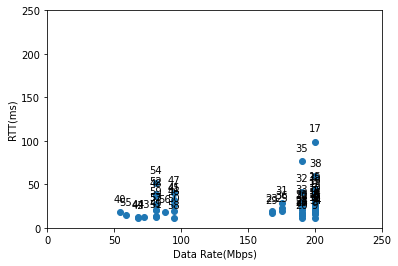

In [22]:
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(X[0], X[1])
count=0
for x,y in zip(X[0],X[1]):
  #label = "{:.2f}".format(y)

  label =  count
  count=count+1
  plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel("Data Rate(Mbps)")
plt.ylabel("RTT(ms)")
plt.ylim(0, 250)
plt.xlim(0, 250)
#plt.xticks(np.arange(0,1,0.1))
#plt.yticks(np.arange(0,1,0.1))
plt.show()

# Hierarchical Clustering by dendrogram

In [23]:
fig = ff.create_dendrogram(X)
fig.update_layout(width=800, height=500)
fig.show()

# K-means

สีเขียว ใช้แทน centroid

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

[[193.5     28.1702]
 [ 81.1125  23.2579]]


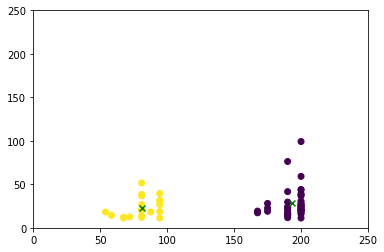

In [25]:
plt.scatter(X[0], X[1], c=y_kmeans)
#centers = kmeans.cluster_centers_
centers = np.array(kmeans.cluster_centers_)
plt.ylim(0, 250)
plt.xlim(0, 250)
print(centers)
plt.scatter(centers[:,0], centers[:,1],marker="x", c='green');
